### Developing and Evaluating a Disease Diagnosis Model Using Use LogisticRegression for classification.

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate a synthetic dataset
np.random.seed(42)

# Number of samples
n_samples = 10000

# Features: age, weight, height, fever (binary), cough (binary), night_sweats (binary), fatigue (binary), headache (binary), loss_of_appetite (binary), chest_pain (binary), joint_pain (binary), blood_pressure, heart_rate, glucose_level, hemoglobin_level
data = {
    'age': np.random.randint(0, 100, n_samples),
    'weight': np.random.randint(30, 100, n_samples),
    'height': np.random.randint(100, 200, n_samples),
    'fever': np.random.randint(0, 2, n_samples),
    'cough': np.random.randint(0, 2, n_samples),
    'night_sweats': np.random.randint(0, 2, n_samples),
    'fatigue': np.random.randint(0, 2, n_samples),
    'headache': np.random.randint(0, 2, n_samples),
    'loss_of_appetite': np.random.randint(0, 2, n_samples),
    'chest_pain': np.random.randint(0, 2, n_samples),
    'joint_pain': np.random.randint(0, 2, n_samples),
    'blood_pressure': np.random.randint(80, 180, n_samples), # systolic blood pressure in mmHg
    'heart_rate': np.random.randint(60, 120, n_samples), # heart rate in beats per minute
    'glucose_level': np.random.randint(70, 200, n_samples), # glucose level in mg/dL
    'hemoglobin_level': np.random.uniform(10, 18, n_samples) # hemoglobin level in g/dL
}

# Labels: 0 for healthy, 1 for malaria, 2 for tuberculosis, 3 for HIV/AIDS
labels = np.random.randint(0, 4, n_samples)

# Create a DataFrame
df = pd.DataFrame(data)
df['disease'] = labels

# Step 2: Data Preprocessing
X = df.drop('disease', axis=1)
y = df['disease']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
df.head(10)

,age,weight,height,fever,cough,night_sweats,fatigue,headache,loss_of_appetite,chest_pain,joint_pain,blood_pressure,heart_rate,glucose_level,hemoglobin_level,disease
0,51,67,137,1,0,1,0,0,1,0,1,169,96,126,13.284838,2
1,92,67,127,1,0,1,0,0,0,1,0,140,86,175,12.507661,2
2,14,82,107,0,1,1,1,1,1,1,1,82,69,178,13.041599,0
3,71,60,173,0,0,0,1,1,1,1,0,118,81,153,10.724531,0
4,60,73,188,1,1,0,0,1,1,0,0,157,103,159,15.102445,2
5,20,89,146,0,0,0,1,1,1,0,1,128,110,120,17.304258,2
6,82,46,135,0,1,1,0,0,0,1,0,93,77,153,15.325810,2
7,86,68,149,1,1,0,1,0,0,1,1,99,63,175,14.644165,0
8,74,71,108,1,1,1,1,1,1,0,0,137,104,140,17.925633,1
9,74,77,159,0,0,0,1,1,0,1,0,123,94,124,14.334705,1


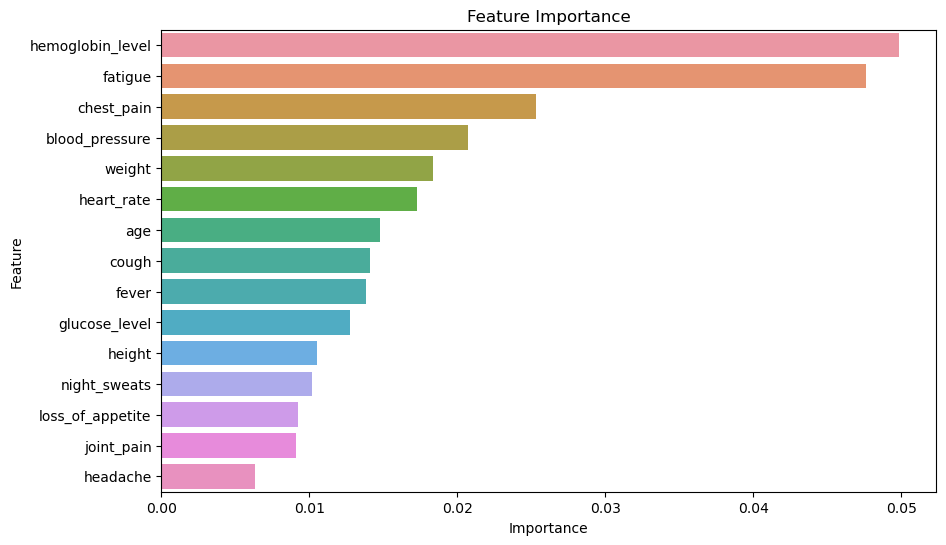

Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

     Healthy       0.26      0.36      0.30       538
     Malaria       0.25      0.19      0.22       480
Tuberculosis       0.26      0.26      0.26       516
    HIV/AIDS       0.23      0.17      0.20       466

    accuracy                           0.25      2000
   macro avg       0.25      0.25      0.24      2000
weighted avg       0.25      0.25      0.25      2000



In [26]:
# Step 3: Model Development
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Healthy', 'Malaria', 'Tuberculosis', 'HIV/AIDS'])

# Feature Importance Plot for Logistic Regression
feature_importances = np.abs(model.coef_[0])
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

### Tutorial: Monitoring Blood Glucose Levels Using Anomaly Detection
In this tutorial, we will develop an anomaly detection model using the Isolation Forest algorithm to identify abnormal blood glucose levels. We'll use Python, pandas, and NumPy to generate a synthetic dataset with various health metrics and train the anomaly detection model. We will evaluate the model's performance using accuracy, precision, recall, and F1-score.

### Step-by-Step Guide
**Step 1: Data Collection and Preparation**

We start by generating a synthetic dataset that simulates the vital signs of patients.



In [66]:
import numpy as np
import pandas as pd

# Generate a synthetic dataset for remote monitoring system
np.random.seed(42)

# Number of samples
n_samples = 1000

# Features: age, heart_rate, systolic_blood_pressure, diastolic_blood_pressure, glucose_level, temperature, oxygen_saturation
data = {
    'age': np.random.randint(0, 100, n_samples),
    'heart_rate': np.random.randint(60, 100, n_samples),
    'systolic_blood_pressure': np.random.randint(90, 180, n_samples),
    'diastolic_blood_pressure': np.random.randint(60, 120, n_samples),
    'glucose_level': np.random.uniform(70, 200, n_samples),
    'temperature': np.random.uniform(36, 39, n_samples), # in Celsius
    'oxygen_saturation': np.random.uniform(90, 100, n_samples) # in percentage
}

# Create a DataFrame
df = pd.DataFrame(data)

In [68]:
df.head(5)

,age,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,glucose_level,temperature,oxygen_saturation
0,51,93,144,92,134.072396,36.198496,95.442573
1,92,67,179,80,122.557667,36.057466,99.757788
2,14,99,132,94,139.021898,38.480576,93.691362
3,71,78,163,111,147.367118,37.574207,93.571923
4,60,96,119,93,71.290097,38.325732,93.440916


### Step 2: Model Development

We use the Isolation Forest algorithm to develop the anomaly detection model.

In [70]:
from sklearn.ensemble import IsolationForest

# Model Development using Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(df[['glucose_level']])


C:\Users\victo\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

### Step 3: Predicting Anomalies

The model is used to predict anomalies in the glucose level data.

In [73]:
# Predict anomalies
df['anomaly'] = isolation_forest.predict(df[['glucose_level']])
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # map anomalies to 1 and normal to 0


### Step 4: Visualizing Anomalies

We visualize the detected anomalies in the glucose levels.

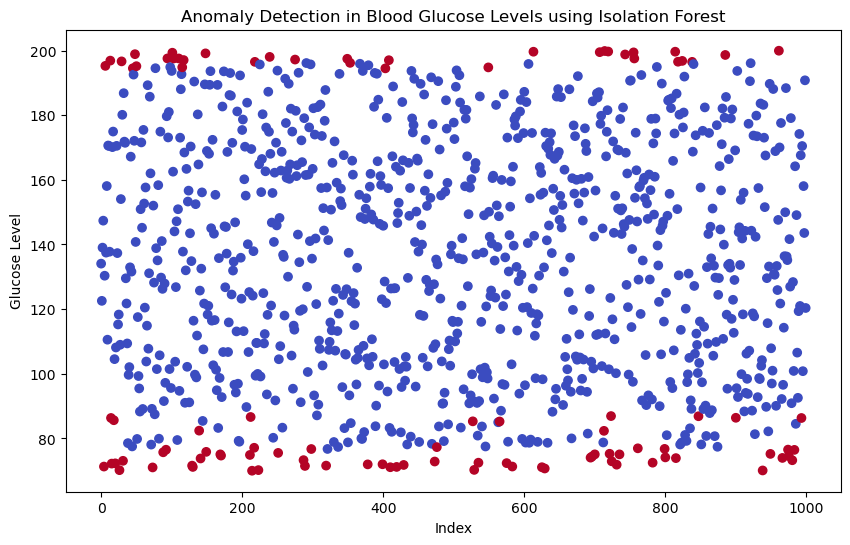

In [76]:
import matplotlib.pyplot as plt

# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['glucose_level'], c=df['anomaly'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Glucose Level')
plt.title('Anomaly Detection in Blood Glucose Levels using Isolation Forest')
plt.show()


### Step 5: Evaluation Metrics
Evaluate the model using accuracy, precision, recall, and F1-score.

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume anomalies are the top 10% highest glucose levels for evaluation purposes
threshold = df['glucose_level'].quantile(0.9)
df['true_anomaly'] = (df['glucose_level'] > threshold).astype(int)

accuracy = accuracy_score(df['true_anomaly'], df['anomaly'])
precision = precision_score(df['true_anomaly'], df['anomaly'])
recall = recall_score(df['true_anomaly'], df['anomaly'])
f1 = f1_score(df['true_anomaly'], df['anomaly'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.868
Precision: 0.34
Recall: 0.34
F1-Score: 0.34


### Results Interpretation
- **Accuracy:** The model's accuracy is 86.8%, meaning that it correctly identifies 86.8% of the data points as either normal or anomalous.
- **Precision:** The precision is 34%, indicating that when the model predicts an anomaly, it is correct 34% of the time.
- ***Recall:** The recall is 34%, meaning that the model detects 34% of the actual anomalies.
- **F1-Score:** The F1-score, which is the harmonic mean of precision and recall, is also 34%.

#### Summary
This tutorial demonstrates how to use the Isolation Forest algorithm to detect anomalies in blood glucose levels. By following these steps, you can develop a model to monitor vital signs and identify abnormal readings, which can be crucial for early detection of potential health issues.